In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [ ]:
df = pd.read_csv("balance (1).csv")
df.shape

(2028, 27)

In [ ]:
del df['age_groups']

In [ ]:
#x = df.drop('Attrition', axis=1)
x = df.drop(['death'], axis=1)
y = df['death']

In [ ]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.8, stratify = y, random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [ ]:
from xgboost import plot_importance, XGBClassifier
import numpy as np
import pandas as pd 
import xlrd, os, csv, math, shap

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import RFE, SelectKBest, chi2

from statsmodels.stats.outliers_influence import variance_inflation_factor


model = XGBClassifier()
xgbfit = model.fit(X_train, y_train)

In [ ]:
y_proba = xgbfit.predict_proba(X_test)
y_pred = xgbfit.predict(X_test)

In [ ]:

explainer_xgb = shap.TreeExplainer(xgbfit,X_test)
shap_values_xgb = explainer_xgb.shap_values(X_test)

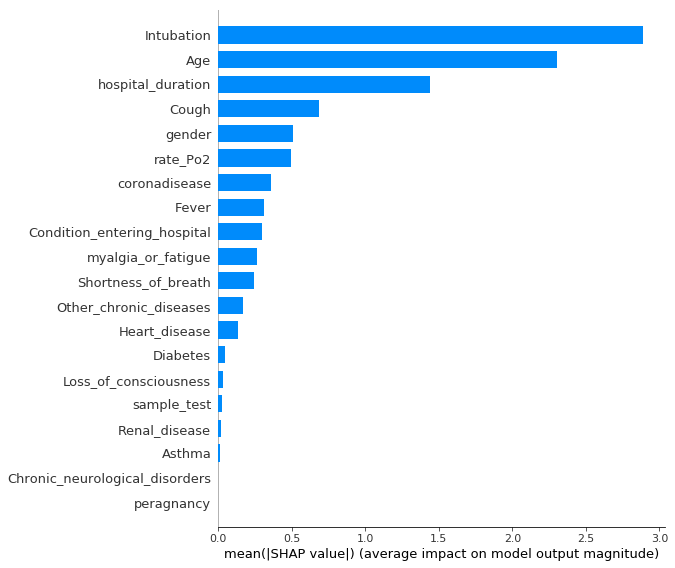

In [ ]:
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")

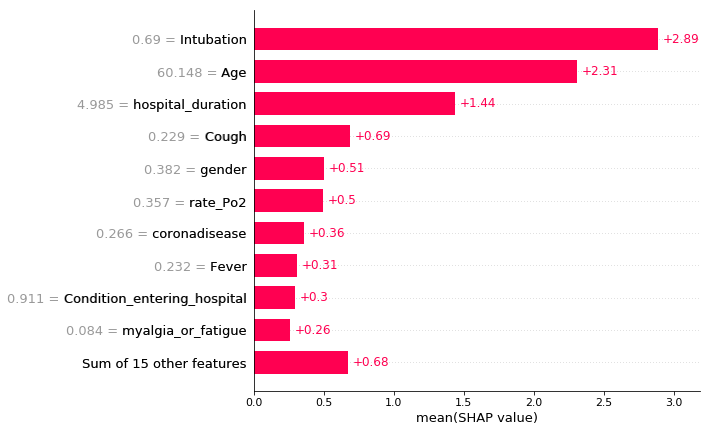

In [ ]:
shap.plots.bar(shap_values, max_display=11)

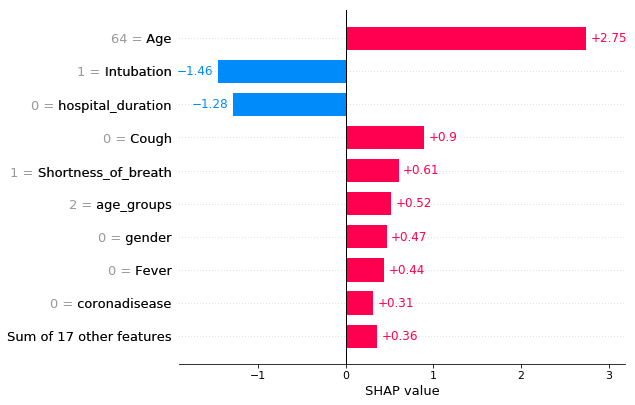

In [ ]:
shap.plots.bar(shap_values[3])

In [ ]:
shap_sum = np.abs(shap_values_xgb).mean(axis=0)
importance_df = pd.DataFrame([X_test.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
1,Intubation,2.89029
0,Age,2.30573
16,hospital_duration,1.44075
17,Cough,0.686772
24,gender,0.505909
2,rate_Po2,0.496036
23,coronadisease,0.358224
21,Fever,0.308544
15,Condition_entering_hospital,0.298569
18,myalgia_or_fatigue,0.260577


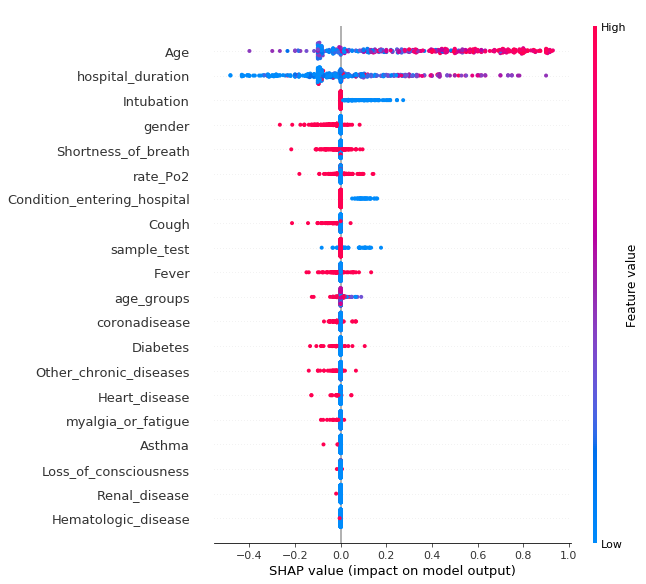

In [ ]:
shap.summary_plot(shap_values, X_test.iloc[0:3000,:])

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[0:1000,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0:1000,:])

In [ ]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_test.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
0,Age,0.271584
1,Intubation,0.104376
24,gender,0.0476944
17,Cough,0.0330176
21,Fever,0.0252042
22,sample_test,0.0191581
23,coronadisease,0.0178055
2,rate_Po2,0.016506
9,Heart_disease,0.0115425
16,hospital_duration,0.00955979


In [ ]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [ ]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_test.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
16,hospital_duration,0.0920031
1,Intubation,0.0901109
24,gender,0.0807414
23,coronadisease,0.0729606
17,Cough,0.0594446
2,rate_Po2,0.0470185
21,Fever,0.0364322
25,age_groups,0.0324267
18,myalgia_or_fatigue,0.0213914
15,Condition_entering_hospital,0.0176408


In [ ]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

In [ ]:
tree_model = DecisionTreeClassifier()


tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_test.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
0,Age,0.306546
1,Intubation,0.226543
16,hospital_duration,0.0458138
2,rate_Po2,0.0238488
24,gender,0.0146182
17,Cough,0.0130839
21,Fever,0.00914719
15,Condition_entering_hospital,0.00839954
9,Heart_disease,0.00814719
22,sample_test,0.0067145


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_test.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
15,Condition_entering_hospital,0.0152538
0,Age,0.0106535
1,Intubation,0.00835546
16,hospital_duration,0.00530713
24,gender,0.00274486
17,Cough,0.00176692
23,coronadisease,0.00138282
21,Fever,0.00114081
18,myalgia_or_fatigue,0.000749769
2,rate_Po2,0.000662371


In [ ]:
def svc_shap_values(X_train, y_train, X_test):
    from sklearn.svm import SVC

    model = SVC(kernel='linear', probability=True)
    model.fit(X_train, y_train)
    f = lambda x: model.predict_proba(x)[:,1]
    med = X_train.median().values.reshape((1,X_train.shape[1]))
    explainer = shap.KernelExplainer(f, med)
    shap_values_single = explainer.shap_values(x.iloc[0,:])
    shap.force_plot(explainer.expected_value, shap_values_single, X_train.iloc[0,:])
    shap_values_svc = explainer.shap_values(X_test.iloc[0:3000,:], nsamples=3000)
    shap.force_plot(explainer.expected_value, shap_values_svc, X_test.iloc[0:3000,:])
    shap_sum = np.abs(shap_values_svc).mean(axis=0)
    importance_df = pd.DataFrame([X_test.columns, shap_sum.tolist()]).T
    importance_df.columns = ['Column Name', 'Shap Importance']
    importance_df= importance_df.sort_values('Shap Importance', ascending = False)
    print(importance_df)
svc_shap_values(X_train, y_train,  X_test)



                       Column Name Shap Importance
0                              Age        0.199995
1                       Intubation        0.121196
24                          gender       0.0580397
17                           Cough       0.0439998
21                           Fever       0.0377032
23                   coronadisease       0.0243017
9                    Heart_disease       0.0214982
2                         rate_Po2       0.0211014
15     Condition_entering_hospital       0.0184944
18              myalgia_or_fatigue       0.0171174
22                     sample_test       0.0140397
19             Shortness_of_breath       0.0122527
16               hospital_duration      0.00517597
11                          Asthma      0.00483408
20           Loss_of_consciousness      0.00351401
10                   Renal_disease      0.00312518
5                         Diabetes      0.00155325
14          Other_chronic_diseases      0.00148816
6              Hematologic_dis

In [ ]:
from xgboost import XGBClassifier
import xgboost
basicparameter={'base_score':0.5,
                'booster':'gbtree',
                'objective':'binary:logistic',
                'scale_pos_weight':1,
                'max_delta_step':5,
                'n_jobs':1,
                'random_state':0, 
                'max_depth':100,
                'min_child_weight':3,
                'n_estimators':300,                
                'subsample':1.0,#0.9,
                'colsample_bytree':0.5,
                'reg_lambda':10,
                'reg_alpha':0.1,
                'learning_rate':0.01,
                'gamma':0.1}                

xgb=xgboost.XGBClassifier(**basicparameter)
# xgb=XGBClassifier() # apply the default parameters
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=5, max_depth=100,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=1, num_parallel_tree=1, random_state=0,
              reg_alpha=0.1, reg_lambda=10, scale_pos_weight=1, subsample=1.0,
              tree_method=None, validate_parameters=False, verbosity=None)

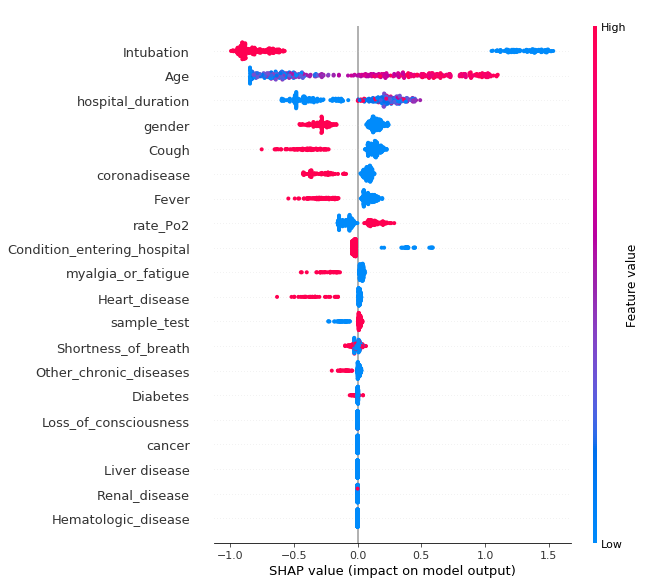

In [ ]:
explainer = shap.Explainer(xgb,X_train)   # define the explainer
shap_values = explainer.shap_values(X_test)  # use all data for analysis

shap.summary_plot(shap_values, X_test)

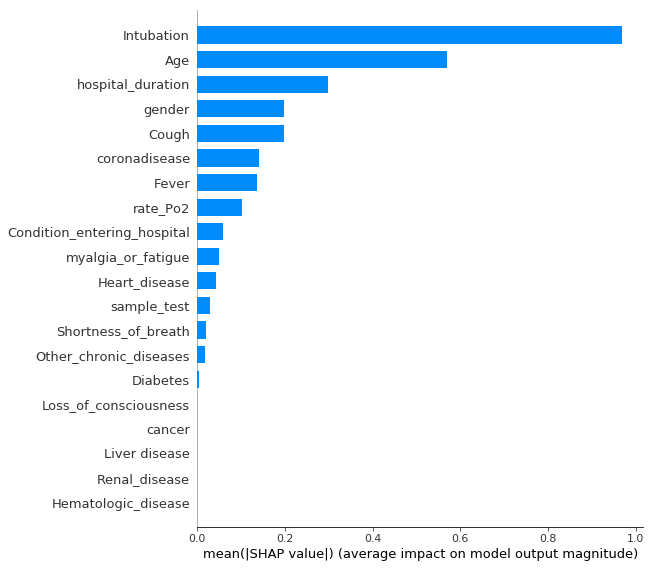

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

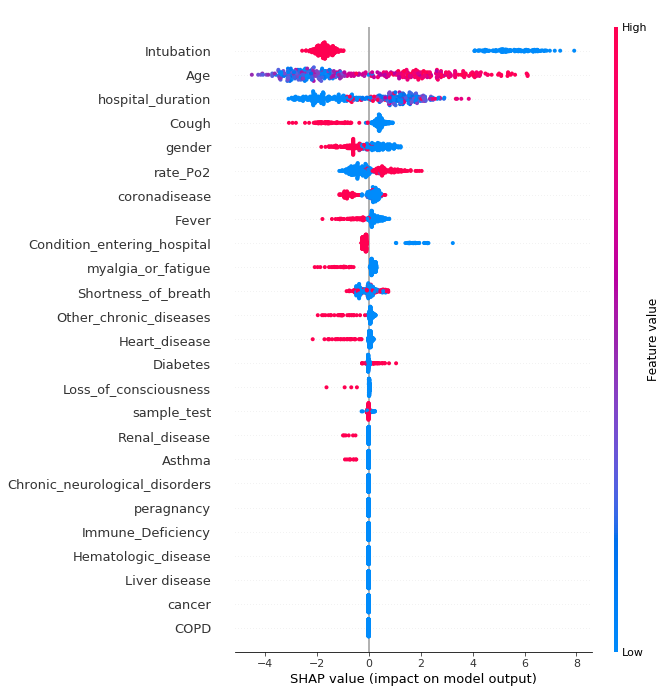

In [ ]:
shap.plots.beeswarm(shap_values)

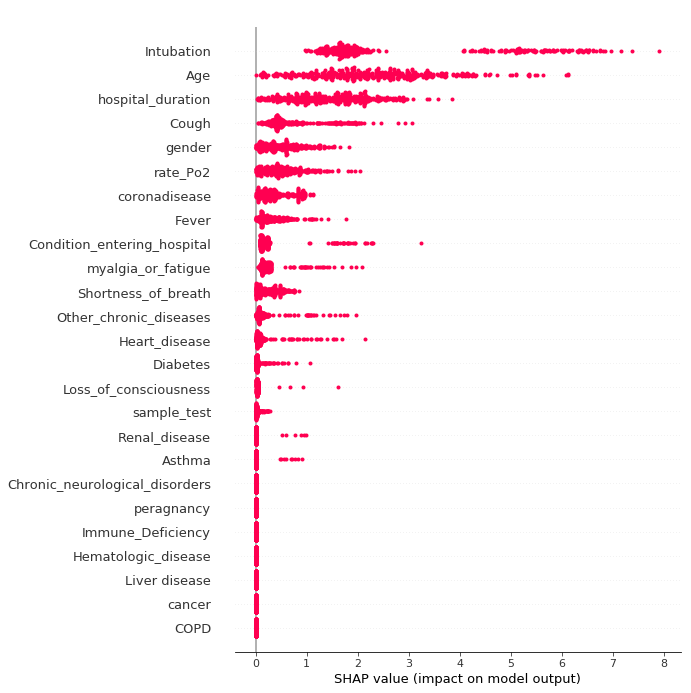

In [ ]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

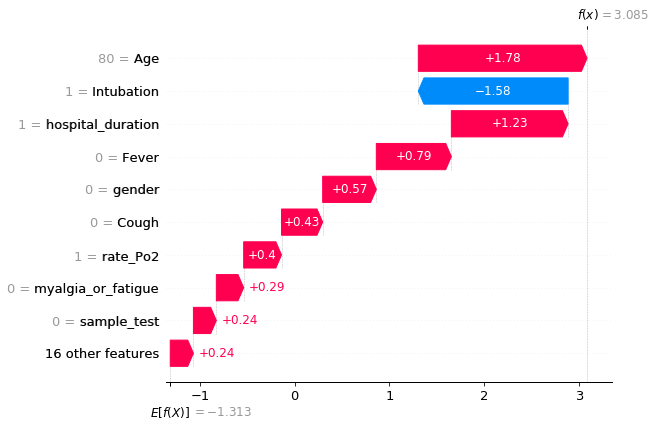

In [ ]:
shap.plots.waterfall(shap_values[0])

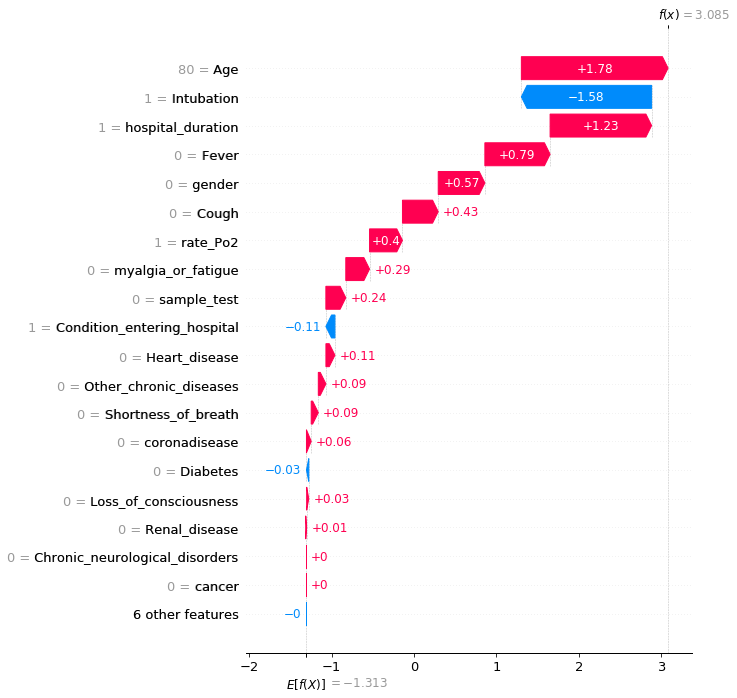

In [ ]:
shap.plots.waterfall(shap_values[0], max_display=20)

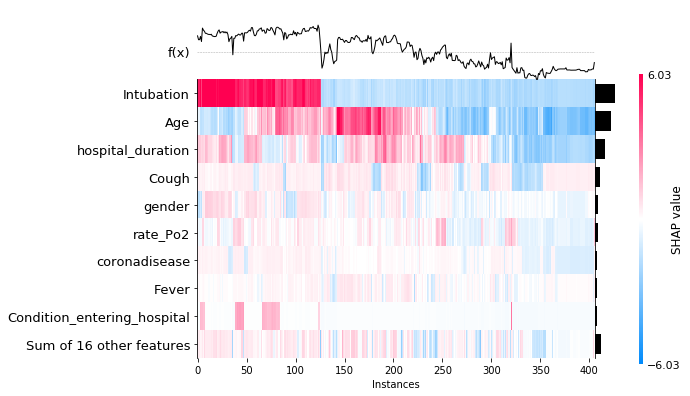

In [ ]:
shap.plots.heatmap(shap_values)

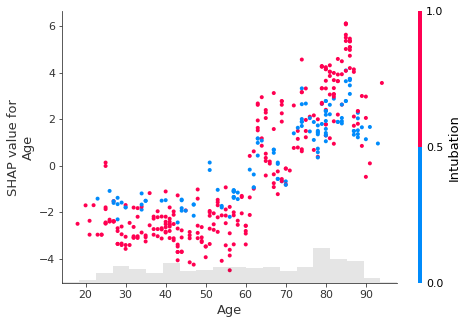

In [ ]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values)

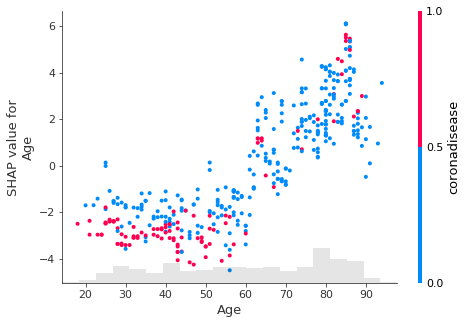

In [ ]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values[:,"coronadisease"])

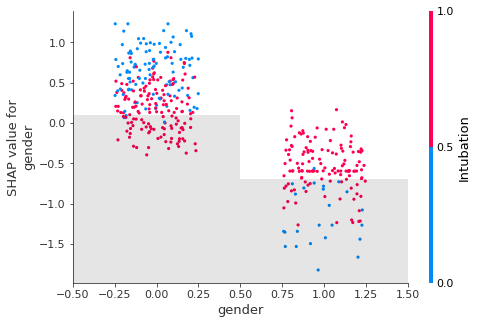

In [ ]:
shap.plots.scatter(shap_values[:,"gender"], dot_size=10, x_jitter=0.5, color=shap_values)